In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("Kaggle connection established!")

Kaggle connection established!


In [2]:
# Download the dataset using its Kaggle name
!kaggle datasets download -d soumikrakshit/anime-faces

# Unzip the downloaded file
# '-q' means 'quiet' so it doesn't print thousands of file names
!unzip -q anime-faces.zip

print("Anime faces downloaded and unzipped successfully!")

Dataset URL: https://www.kaggle.com/datasets/soumikrakshit/anime-faces
License(s): unknown
 90% 397M/441M [00:00<00:00, 484MB/s]
100% 441M/441M [00:00<00:00, 508MB/s]
Anime faces downloaded and unzipped successfully!


Found 43102 files.
Dataset loaded and normalized! Let's see a sample.


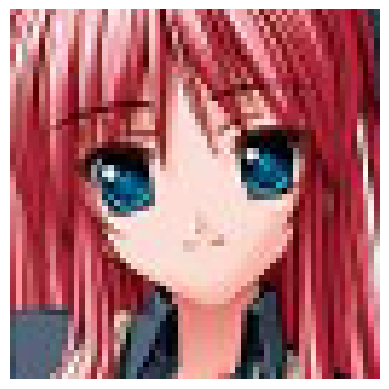

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. Configuration
IMAGE_SIZE = 64  # We will resize all images to 64x64
BATCH_SIZE = 64  # How many images the AI looks at at once

# 2. Load the dataset from the unzipped folder
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/data",
    label_mode=None,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True
)

# 3. Normalize the images to [-1, 1]
# Formula: (Pixel - 127.5) / 127.5
def normalize(image):
    image = (image - 127.5) / 127.5
    return image

# Apply the normalization to the whole dataset
train_dataset = train_dataset.map(normalize)

print("Dataset loaded and normalized! Let's see a sample.")

# 4. Quick check: Display one image to make sure it looks right
for images in train_dataset.take(1):
    plt.imshow((images[0].numpy() * 127.5 + 127.5).astype("uint8"))
    plt.axis("off")
    plt.show()

In [4]:
import tensorflow as tf
from tensorflow.keras import layers # This is the line we missed

# The Generator - The "Artist"
def build_generator():
    model = tf.keras.Sequential([
        # 1. Start with a dense layer to take 100 random numbers and make them a 4x4x1024 block
        layers.Dense(4 * 4 * 1024, input_shape=(100,)),
        layers.Reshape((4, 4, 1024)),

        # 2. Upsample to 8x8
        layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"),
        layers.BatchNormalization(),
        layers.LeakyReLU(0.2), # Using LeakyReLU for better stability

        # 3. Upsample to 16x16
        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        layers.BatchNormalization(),
        layers.LeakyReLU(0.2),

        # 4. Upsample to 32x32
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        layers.BatchNormalization(),
        layers.LeakyReLU(0.2),

        # 5. Final Upsample to 64x64
        # 3 filters for RGB colors
        layers.Conv2DTranspose(3, kernel_size=4, strides=2, padding="same", activation="tanh")
    ])
    return model

# Create the generator
generator = build_generator()
generator.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16384)          │     1,654,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 512)      │     8,389,120 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 256)    │     2,097,408 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 128)    │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 64, 64, 3)      │         6,147 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,675,459 (48.35 MB)

 Trainable params: 12,673,667 (48.35 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [5]:
# The Discriminator - The "Critic"
def build_discriminator():
    model = tf.keras.Sequential([
        # 1. Input is a 64x64 color image
        layers.Input(shape=(64, 64, 3)),

        # 2. First convolution: shrink to 32x32
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(0.2), # Standard for Discriminators

        # 3. Second convolution: shrink to 16x16
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.BatchNormalization(),
        layers.LeakyReLU(0.2),

        # 4. Third convolution: shrink to 8x8
        layers.Conv2D(256, kernel_size=4, strides=2, padding="same"),
        layers.BatchNormalization(),
        layers.LeakyReLU(0.2),

        # 5. Fourth convolution: shrink to 4x4
        layers.Conv2D(512, kernel_size=4, strides=2, padding="same"),
        layers.BatchNormalization(),
        layers.LeakyReLU(0.2),

        # 6. Final Decision Layer
        layers.Flatten(),
        layers.Dropout(0.3), # Prevents the critic from being "too smart" too fast
        layers.Dense(1, activation="sigmoid") # Output: 0 (Fake) to 1 (Real)
    ])
    return model

# Create the discriminator
discriminator = build_discriminator()
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 512)      │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         8,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,768,321 (10.56 MB)

 Trainable params: 2,766,529 (10.55 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [6]:
# 1. The scoring system (Loss Function)

# 'from_logits=False' because we used 'sigmoid' in the discriminator
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

# 2. Discriminator Loss: How good is it at telling Real from Fake?
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output) # Should be 1
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output) # Should be 0
    return real_loss + fake_loss

# 3. Generator Loss: Did it trick the critic?
def generator_loss(fake_output):
    # The generator wants the critic to think the fakes are 1 (Real)
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# 4. The Optimizers (The "Study Methods")
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

print("Loss functions and Optimizers are ready.")

Loss functions and Optimizers are ready.


In [7]:
# The '@tf.function' makes this run much faster by compiling it into a graph
@tf.function
def train_step(images):
    # 1. Create random noise for the Generator
    noise = tf.random.normal([BATCH_SIZE, 100])

    # 2. Open two "tapes" to record the math for both models
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:

        # Generator creates images
        generated_images = generator(noise, training=True)

        # Discriminator evaluates REAL images and FAKE images
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        # Calculate how much each model "messed up"
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    # 3. Calculate the gradients (the "directions" for improvement)
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    # 4. Apply the gradients to update the models
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

print("Training step function is ready.")

Training step function is ready.


In [8]:
import numpy as np

# 1. Helper function to show and save images during training
def generate_and_save_images(model, epoch, test_input):
    # 'training=False' is important so layers like BatchNormalization don't update
    predictions = model(test_input, training=False)

    plt.figure(figsize=(8, 8))
    for i in range(16): # Show a 4x4 grid of faces
        plt.subplot(4, 4, i+1)
        # Denormalize from [-1, 1] back to [0, 255] for plotting
        plt.imshow((predictions[i].numpy() * 127.5 + 127.5).astype("uint8"))
        plt.axis('off')

    plt.suptitle(f"Generated Images at Epoch {epoch}")
    plt.show()

# 2. Setup for the loop
EPOCHS = 30
# Constant noise so we can watch the SAME 16 "people" evolve over time
seed = tf.random.normal([16, 100])

# 3. The Main Training Loop
def train(dataset, epochs):
    for epoch in range(epochs):
        print(f"\nStarting Epoch {epoch+1}...")

        for image_batch in dataset:
            # Run one step of the battle
            gen_loss, disc_loss = train_step(image_batch)

        # Every 5 epochs, show us the progress
        if (epoch + 1) % 5 == 0:
            generate_and_save_images(generator, epoch + 1, seed)
            print(f"Gen Loss: {gen_loss:.4f}, Disc Loss: {disc_loss:.4f}")

# 4. RUN IT!
train(train_dataset, EPOCHS)

Output hidden; open in https://colab.research.google.com to view.

In [9]:
# Save the Generator for creating images later
generator.save("anime_generator_final.keras")

print("Generator saved successfully as 'anime_generator_final.keras'!")

Generator saved successfully as 'anime_generator_final.keras'!


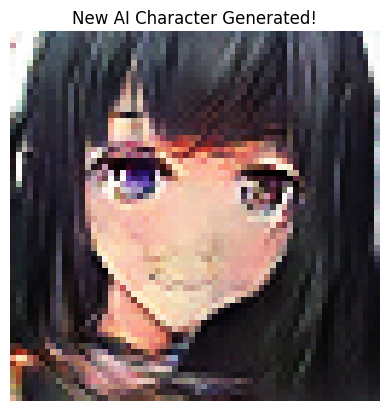

In [18]:
import matplotlib.pyplot as plt

def generate_one_now():
    # 1. Random noise 'seed'
    seed = tf.random.normal([1, 100])

    # 2. Generate
    prediction = generator(seed, training=False)

    # 3. Show
    plt.imshow((prediction[0].numpy() * 127.5 + 127.5).astype("uint8"))
    plt.axis('off')
    plt.title("New AI Character Generated!")
    plt.show()

# Just call this function whenever you want a new face!
generate_one_now()